In [2]:
from tqdm import tqdm
import mdtraj as md
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import hdbscan 
import seaborn as sns

### Loading closeness centralities

In [3]:
closeness = np.load("../Closeness_Centralities_full_length_FAT10.npy")

### Performing the PCA using scikit learn

In [4]:
pca = PCA(n_components=10) # Selecting the first ten principal components for dimensionality reduction
pca_embedding = pca.fit_transform(closeness)

### Calculating the explained variance in proportion to the full variance

In [5]:
pca.explained_variance_ratio_

array([0.63233848, 0.0999735 , 0.07888522, 0.03415872, 0.02199638,
       0.01840099, 0.00986171, 0.00797873, 0.00721129, 0.00624523])

### Clustering the PCA using HDBSCAN

In [6]:
clusterer        = hdbscan.HDBSCAN(min_cluster_size=100, 
                                   min_samples=800, 
                                   cluster_selection_method='eom')
clusterer.fit(pca_embedding[:,0:2])
cluster_ids_PCA           = clusterer.labels_

### Loading centroid indices for EncoderMap clusters from previous centroid calculation
Code for this can be found in [4_Clustering_EncoderMap_full_length_FAT10.ipynb](../4_Clustering_EncoderMap_full_length_FAT10.ipynb)

In [7]:
centroid_indices_EM = [241819,
 136097,
 201335,
 254109,
 27287,
 170337,
 5995,
 250939,
 132888,
 71269,
 23239,
 76980,
 269480]

In [8]:
# Defintion of a custom colormap to enable specific coloring of the cluster markers

KN_colors = [matplotlib.colors.hex2color(hexcolor) for hexcolor in [
    '#9AA0A7',
    '#008ECE',
    '#3E5496',
    '#0A9086',
    '#A6E1F4',
    '#0AA398', 
    '#398D9F',
    '#00A9E0',
    '#85D1CC', 
    '#9CC6CF',
    '#59C7EB', 
    '#B4BCD6',
    '#FEA090',
    '#8E2043'   
]]
KN_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom_colormap", KN_colors)

In [9]:
# Defintion of a custom colormap to enable specific coloring of the KDE Plot
cmap = plt.cm.get_cmap("magma", 5)

### Plotting PCs 1 and 2 overlaid with cluster outlines for cluster 1 and 2 and centroid marker for EncoderMap clusters 11 (peach) and 12 (red)

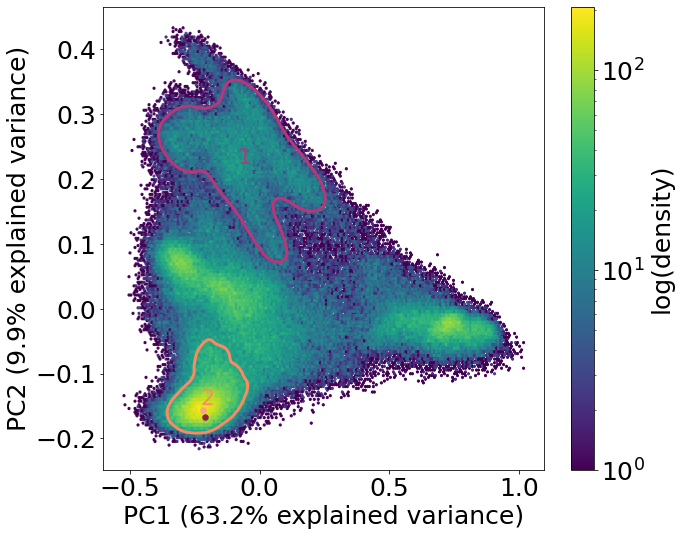

In [10]:
%matplotlib inline
plt.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(figsize = (10,8),
                       tight_layout = True)
hex_map = ax.hexbin(pca_embedding[:,0], 
                    pca_embedding[:,1],
                    cmap = 'viridis', 
                    bins = 'log', 
                    mincnt =1, 
                    gridsize = 200)
#Plot marker for EncoderMap cluster 12 
cluster = 12
plt.scatter(pca_embedding[centroid_indices_EM[cluster],0],
            pca_embedding[centroid_indices_EM[cluster],1], 
            s = 30,
            color = KN_colors[cluster+1])
#Plot marker for EncoderMap cluster 11
cluster = 11
plt.scatter(pca_embedding[centroid_indices_EM[cluster],0],
            pca_embedding[centroid_indices_EM[cluster],1], 
            s = 30,
            color = KN_colors[cluster+1])
#Overlay the cluster outlines
for cluster in [1,2]: 
    if cluster > -1:
        cluster_points = pca_embedding[np.where(cluster_ids_PCA == cluster)][::10]
        kdeplot = sns.kdeplot(x = cluster_points[:,0], 
                    y = cluster_points[:,1], 
                    fill = False,
                    levels = 1,
                    color = cmap(cluster+1), 
                    linewidths =3)
        kdeplot.clabel = "102"
        cluster_center_x = np.mean(pca_embedding[np.where(cluster_ids_PCA == cluster), 0])
        cluster_center_y = np.mean(pca_embedding[np.where(cluster_ids_PCA == cluster), 1])
        ax.text(cluster_center_x, 
                cluster_center_y,  
                cluster, 
                horizontalalignment='center',
                verticalalignment='center',
                size = 22, 
                color = cmap(cluster+1))
#ax.set_axis_off()
cb = plt.colorbar(hex_map, 
                  label = "log(density)")
plt.xlabel('PC1 (63.2% explained variance)')
plt.ylabel('PC2 (9.9% explained variance)')
cb.set_alpha(1)
cb.draw_all()
plt.savefig("PCA_PCs_1_2_with_centroids.png", dpi = 300)

### Plotting PCs 3 and 2 overlaid with cluster outlines for cluster 1 and 2 and centroid marker for EncoderMap clusters 11 (peach) and 12 (red)
This produces a 'front on view' of the PCA with Pcs 1 and 2

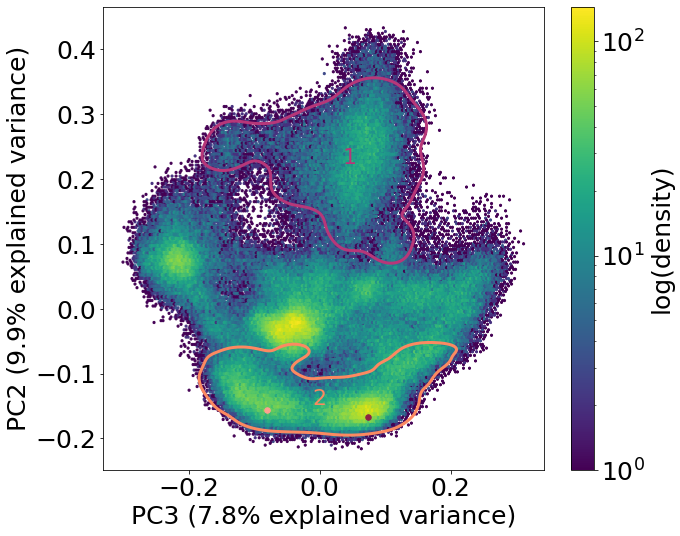

In [11]:
%matplotlib inline
plt.rcParams.update({'font.size': 25})
fig, ax = plt.subplots(figsize = (10,8),
                       tight_layout = True)
hex_map = ax.hexbin(pca_embedding[:,2], 
                    pca_embedding[:,1],
                    cmap = 'viridis', 
                    bins = 'log', 
                    mincnt =1, 
                    gridsize = 200)

cluster = 12
plt.scatter(pca_embedding[centroid_indices_EM[cluster],2],
            pca_embedding[centroid_indices_EM[cluster],1],     
            s = 30,
            color = KN_colors[cluster+1])
cluster = 11
plt.scatter(pca_embedding[centroid_indices_EM[cluster],2],
            pca_embedding[centroid_indices_EM[cluster],1],     
            s = 30,
            color = KN_colors[cluster+1])

#Overlay the cluster outlines
for cluster in [1,2]: 
    if cluster > -1:
        cluster_points = pca_embedding[np.where(cluster_ids_PCA == cluster)][::10]
        kdeplot = sns.kdeplot(x = cluster_points[:,2], 
                    y = cluster_points[:,1], 
                    fill = False,
                    levels = 1,
                    color = cmap(cluster+1), 
                    linewidths =3)
        kdeplot.clabel = "102"
        cluster_center_x = np.mean(pca_embedding[np.where(cluster_ids_PCA == cluster), 2])
        cluster_center_y = np.mean(pca_embedding[np.where(cluster_ids_PCA == cluster), 1])
        ax.text(cluster_center_x, 
                cluster_center_y,  
                cluster, 
                horizontalalignment='center',
                verticalalignment='center',
                size = 22, 
                color = cmap(cluster+1))
#ax.set_axis_off()
plt.xlabel('PC3 (7.8% explained variance)')
plt.ylabel('PC2 (9.9% explained variance)')

cb = plt.colorbar(hex_map, 
                  label = "log(density)")
cb.set_alpha(1)
cb.draw_all()
plt.savefig("PCA_PCs_3_2_with_centroids.png", dpi = 300)